In [1]:
# This assignment was created by Joseph Lee and it is about creating your very first Convolutional neural network to predict what is contained within the image Ethan Nguyen
# download our dataset, CIFAR-10

from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
x_train shape: (50000, 32, 32, 3)


In [15]:
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


In [2]:
print('y_train shape:', y_train.shape)

y_train shape: (50000, 1)


In [3]:
#print out the first image of our training dataset 
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


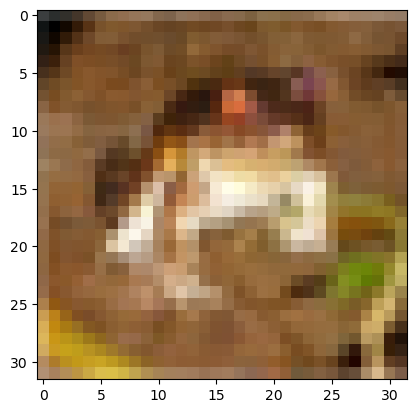

In [6]:
#use a function from matplotlib to see the image
import matplotlib.pyplot as plt
%matplotlib inline
img = plt.imshow(x_train[0])

In [7]:
print('The label is:', y_train[0])

The label is: [6]


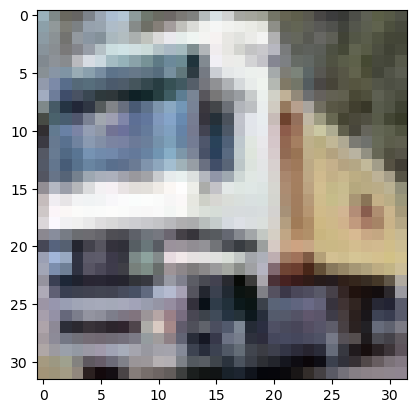

In [9]:
#2nd image in the dataset
img = plt.imshow(x_train[1])

In [12]:
print('The label is:', y_train[1])

The label is: [9]


In [13]:
# convert our labels to our one-hot encoding,#use a function in Keras
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)
print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [14]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [16]:
# convert our labels to our one-hot encoding, we use a function in Keras
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255
x_train[0]

array([[[0.00090734, 0.00095348, 0.00096886],
        [0.00066128, 0.00070742, 0.00069204],
        [0.00076894, 0.00073818, 0.00066128],
        ...,
        [0.00242983, 0.00202999, 0.0016609 ],
        [0.00233756, 0.00192234, 0.00156863],
        [0.00227605, 0.00190696, 0.00158401]],

       [[0.00024606, 0.00030757, 0.00030757],
        [0.        , 0.        , 0.        ],
        [0.00027682, 0.00012303, 0.        ],
        ...,
        [0.00189158, 0.00135333, 0.00084583],
        [0.00183007, 0.00127643, 0.00076894],
        [0.0018762 , 0.00133795, 0.00087659]],

       [[0.00038447, 0.00036909, 0.00032295],
        [0.00024606, 0.00010765, 0.        ],
        [0.00075356, 0.00041522, 0.00012303],
        ...,
        [0.00181469, 0.00129181, 0.00076894],
        [0.00184544, 0.00129181, 0.00076894],
        [0.00167628, 0.00112265, 0.00064591]],

       ...,

       [[0.00319877, 0.00261438, 0.00147636],
        [0.00309112, 0.00235294, 0.00052288],
        [0.00304498, 0

In [18]:
#Building and Training our Convolutional Neural Network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
model = Sequential()
# specify an input size for our first layer; subsequent layers does not have this specification since they can infer the input size from the output size of the previous layer.
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))
#second layer looks like this
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
#The default for a max pooling layer stride is the pool size, so we don't have to specify the stride:
model.add(MaxPooling2D(pool_size=(2, 2)))
#add dropout layer with probability of 0.25
model.add(Dropout(0.25))
#The next four layers look really similar
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#add a Flatten layer
model.add(Flatten())
#dense (FC) layer of 512 neurons with relu activation
model.add(Dense(512, activation='relu'))
#add another dropout
model.add(Dropout(0.5))
#add dense (FC) layer with 10 neurons and softmax activation
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
#track the accuracy of our model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# specify how much of our dataset will be used as a validation set. In this case, 20% of our dataset is used as a validation set
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 62s 48ms/step - accuracy: 0.0981 - loss: 2.3028 - val_accuracy: 0.0952 - val_loss: 2.3029
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 67ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.0952 - val_loss: 2.3030
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 159s 127ms/step - accuracy: 0.1001 - loss: 2.3027 - val_accuracy: 0.0952 - val_loss: 2.3028
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 176s 141ms/step - accuracy: 0.1004 - loss: 2.3028 - val_accuracy: 0.0977 - val_loss: 2.3028
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 177s 142ms/step - accuracy: 0.1019 - loss: 2.3026 - val_accuracy: 0.1003 - val_loss: 2.3027
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 162s 129ms/step - accuracy: 0.0979 - loss: 2.3028 - val_accuracy: 0.0977 - val_loss: 2.3027
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 159s 127ms/step - accuracy: 0.0998 - loss: 2.3027 - val_accuracy: 0.0977 - val_loss: 2.3027
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 174s 139ms/step - accura

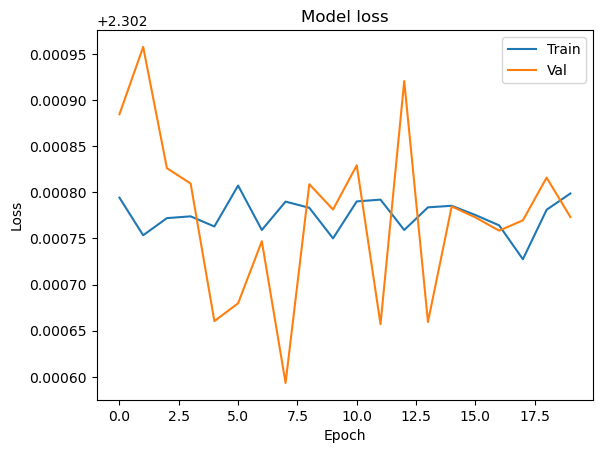

In [21]:
#visualize the model training and validation loss as well as training / validation accuracy over the number of epochs using the below code
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

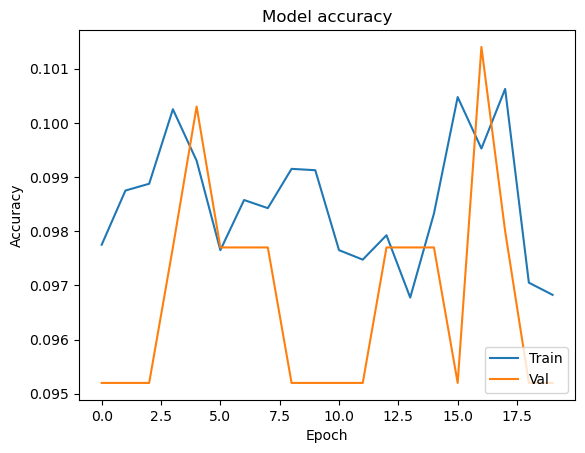

In [23]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [24]:
#test
model.evaluate(x_test, y_test_one_hot)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.1006 - loss: 2.3026


0.10000000149011612

In [ ]:
# Save the trained model
model.save('my_cifar10_model.h5')


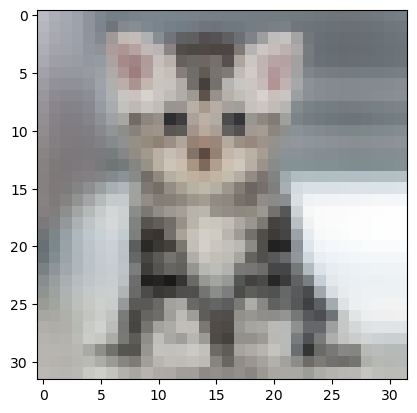

In [49]:
#Testing out with your own images
my_image = plt.imread(r"C:\Users\ethan\Downloads\cat.jpg")

# Resize the image
my_image_resized = resize(my_image, (32,32,3))

# Display the resized image
img = plt.imshow(my_image_resized)
plt.show()


In [50]:
#output
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))
probabilities

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


array([[0.09823171, 0.09120524, 0.10714233, 0.11625381, 0.09707105,
        0.09547438, 0.09687029, 0.09736361, 0.1033465 , 0.09704107]],
      dtype=float32)

In [51]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: cat -- Probability: 0.11625381
Second most likely class: bird -- Probability: 0.10714233
Third most likely class: ship -- Probability: 0.103346504
Fourth most likely class: airplane -- Probability: 0.09823171
Fifth most likely class: horse -- Probability: 0.097363606


# This assignment was created by Joseph Lee